##### Name :- Kartik Dabre
##### Email:- Kartikdabre199@gmail.com
##### phone no:- 9172838713
###   Assignment of Stucred

### Importing libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the csv file

In [7]:

data = pd.read_csv('G:/regression/loan_data.csv')


In [8]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### 1. Factors affecting interest rate

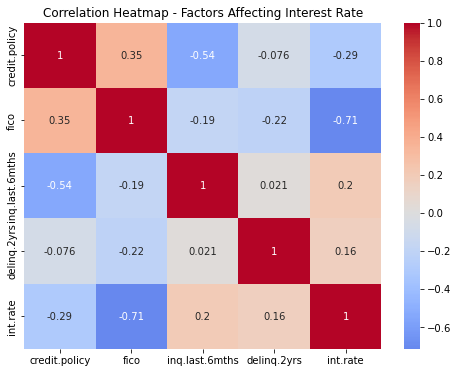

In [9]:
interest_factors = ['credit.policy', 'fico', 'inq.last.6mths', 'delinq.2yrs']
interest_corr = data[interest_factors + ['int.rate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(interest_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - Factors Affecting Interest Rate')
plt.show()


#### Interpretation:- 
1.Correlation heatmap shows that there is negative correlation between fico and int.
rate so the The FICO credit score of the borrower is affecting negatively to the interest rate.

2.the last 6 months and last 2 years data shows positive correlation to the interest rate

### 2. Factors for evaluating risk

<Figure size 720x432 with 0 Axes>

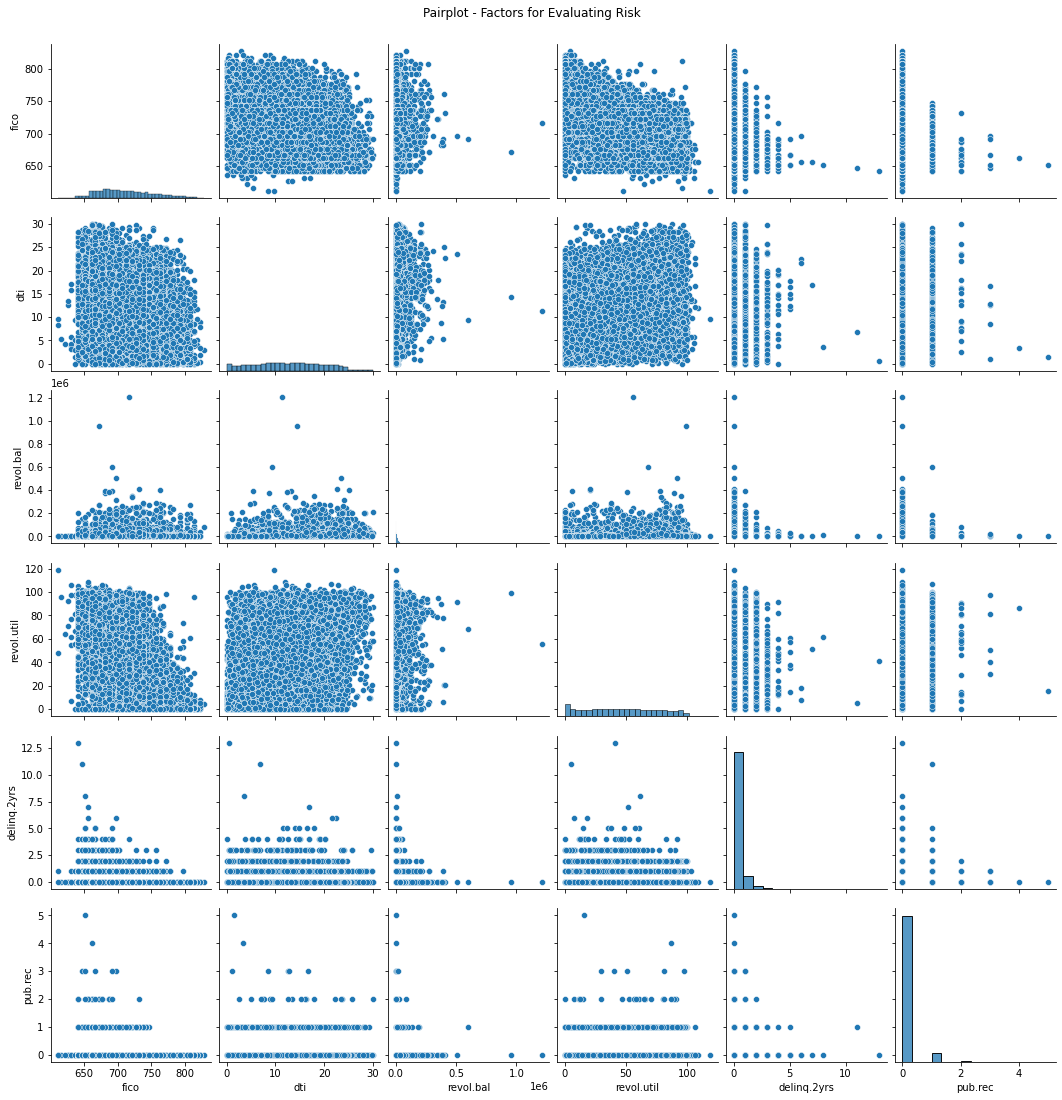

In [10]:
risk_factors = ['fico', 'dti', 'revol.bal', 'revol.util', 'delinq.2yrs', 'pub.rec']
risk_data = data[risk_factors]

plt.figure(figsize=(10, 6))
sns.pairplot(risk_data)
plt.suptitle('Pairplot - Factors for Evaluating Risk', y=1.02)
plt.show()



#### Interpretation:- 

### 3. Delinquency trends

<Figure size 720x432 with 0 Axes>

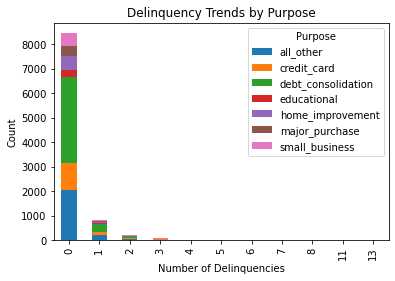

In [13]:

delinquency_trends = data.groupby('delinq.2yrs')['purpose'].value_counts().unstack()

plt.figure(figsize=(10, 6))
delinquency_trends.plot(kind='bar', stacked=True)
plt.title('Delinquency Trends by Purpose')
plt.xlabel('Number of Delinquencies')
plt.ylabel('Count')
plt.legend(title='Purpose')
plt.show()


### 4. Best loan combination (hypothetical example)

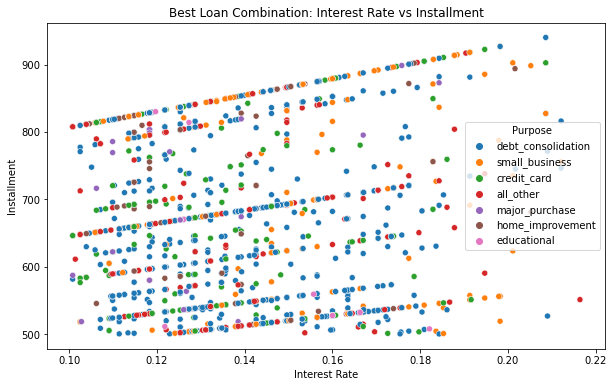

In [14]:
best_loan = data[(data['int.rate'] > 0.1) & (data['installment'] > 500) & (data['pub.rec'] == 0)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='int.rate', y='installment', hue='purpose', data=best_loan)
plt.title('Best Loan Combination: Interest Rate vs Installment')
plt.xlabel('Interest Rate')
plt.ylabel('Installment')
plt.legend(title='Purpose')
plt.show()


### 5. Correlations between FICO and credit history/behavior

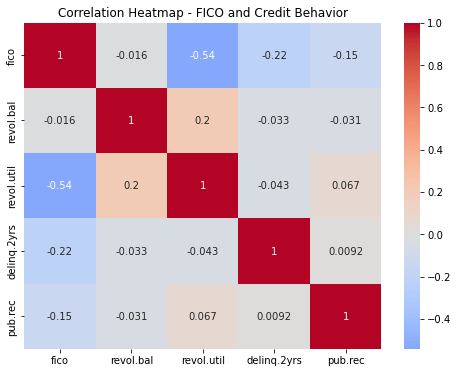

In [15]:
fico_corr = data[['fico', 'revol.bal', 'revol.util', 'delinq.2yrs', 'pub.rec']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(fico_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap - FICO and Credit Behavior')
plt.show()



### 6. Trends from revolving utilization rate and revolving balance

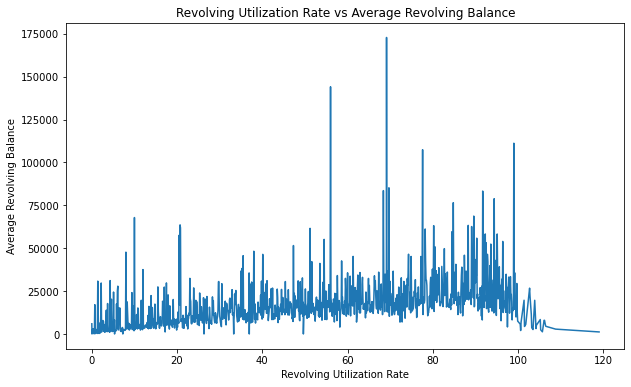

In [16]:
revolving_trends = data.groupby('revol.util')['revol.bal'].mean()

plt.figure(figsize=(10, 6))
revolving_trends.plot()
plt.title('Revolving Utilization Rate vs Average Revolving Balance')
plt.xlabel('Revolving Utilization Rate')
plt.ylabel('Average Revolving Balance')
plt.show()


### 7. Most beneficial loan purpose

C:\Users\karti\AppData\Local\Temp\ipykernel_12812\2541015335.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  purpose_benefits = data.groupby('purpose')['int.rate', 'installment', 'pub.rec'].mean()


<Figure size 720x432 with 0 Axes>

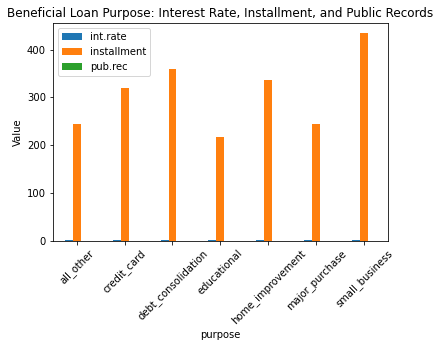

In [17]:
purpose_benefits = data.groupby('purpose')['int.rate', 'installment', 'pub.rec'].mean()

plt.figure(figsize=(10, 6))
purpose_benefits.plot(kind='bar')
plt.title('Beneficial Loan Purpose: Interest Rate, Installment, and Public Records')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


### 8. Relationship between days with a credit line and repayment status

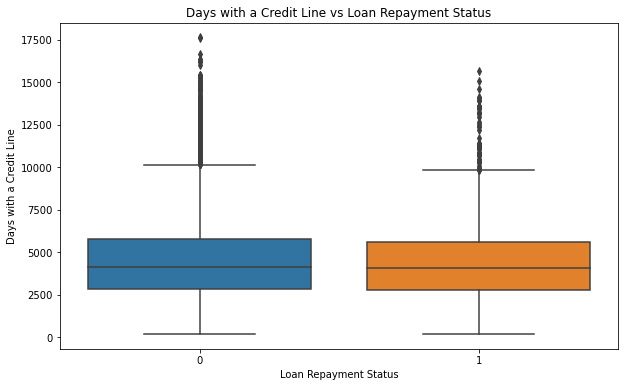

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='not.fully.paid', y='days.with.cr.line', data=data)
plt.title('Days with a Credit Line vs Loan Repayment Status')
plt.xlabel('Loan Repayment Status')
plt.ylabel('Days with a Credit Line')
plt.show()


### 9. Relationship between credit history and credit policy

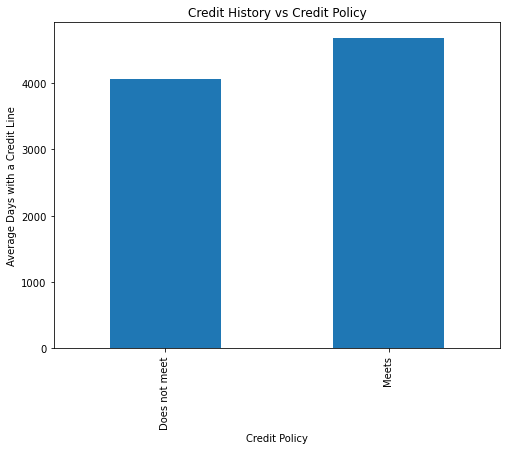

In [19]:
credit_history_policy = data.groupby('credit.policy')['days.with.cr.line'].mean()

plt.figure(figsize=(8, 6))
credit_history_policy.plot(kind='bar')
plt.title('Credit History vs Credit Policy')
plt.xlabel('Credit Policy')
plt.ylabel('Average Days with a Credit Line')
plt.xticks([0, 1], ['Does not meet', 'Meets'])
plt.show()
